In [0]:
#from __future__ import divison, print_function, unicode_literals
import numpy as np
import tensorflow as tf

In [0]:
%matplotlib inline

In [0]:
import matplotlib
import matplotlib.pyplot as plt

In [0]:
from google.colab import files

In [5]:
files.upload()

Saving durudataset.txt to durudataset (1).txt


{'durudataset.txt': b'0.196705753183788\t0.266174967499455\n0.413286989521383\t0.355828352990633\n0.338435546719209\t0.435738258997923\n0.103801517189990\t0.164344805836115\n0.159052363075132\t0.325059012698889\n0.0669054926780630\t0.487418074001379\n0.335731444739015\t0.0379836806470678\n0.285495537731203\t0.293509583541386\n0.0848835330132443\t0.206943248886680\n0.0738278885758684\t0.154568213233134\n0.238039859133728\t0.131917020763398\n0.454051208253475\t0.379383132540102\n0.276087513357917\t0.497607990564876\n0.0164699463749383\t0.0932857220706846\n0.0269314632177781\t0.390572634267382\n0.402531614279451\t0.0978989905133660\n0.225687427351724\t0.496179486589963\n0.191323114779979\t0.401130784882144\n0.394821851844845\t0.212113354951653\n0.182143434749897\t0.364431934025687\n1.49835358252355\t1.40350138880436\n1.80899026719904\t1.93497908617805\n1.35650893348105\t1.47948454563248\n1.07324343448981\t1.23179161166312\n1.59099145527485\t1.39629024850978\n1.91018783072814\t1.7050774751

In [0]:
#files.download('durudataset.txt')

In [6]:
print(tf.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.12.0
1.14.6
2.1.2


In [0]:
def load_dataset(name):
    return np.loadtxt(name)

dataset = load_dataset('durudataset.txt')

In [8]:
dataset

array([[0.19670575, 0.26617497],
       [0.41328699, 0.35582835],
       [0.33843555, 0.43573826],
       [0.10380152, 0.16434481],
       [0.15905236, 0.32505901],
       [0.06690549, 0.48741807],
       [0.33573144, 0.03798368],
       [0.28549554, 0.29350958],
       [0.08488353, 0.20694325],
       [0.07382789, 0.15456821],
       [0.23803986, 0.13191702],
       [0.45405121, 0.37938313],
       [0.27608751, 0.49760799],
       [0.01646995, 0.09328572],
       [0.02693146, 0.39057263],
       [0.40253161, 0.09789899],
       [0.22568743, 0.49617949],
       [0.19132311, 0.40113078],
       [0.39482185, 0.21211335],
       [0.18214343, 0.36443193],
       [1.49835358, 1.40350139],
       [1.80899027, 1.93497909],
       [1.35650893, 1.47948455],
       [1.07324343, 1.23179161],
       [1.59099146, 1.39629025],
       [1.91018783, 1.70507748],
       [1.19376594, 1.55855903],
       [1.43236779, 1.7566307 ],
       [1.74915973, 1.99548106],
       [1.03918449, 1.9624314 ],
       [1.

In [0]:
#import random
#input_2d_x_1 = np.array([[random.randint(1, 500) for i in range(2) for  j in range(50)]])
#input_2d_x_2 = np.array([[random.randint(400, 900) for i in range(2) for  j in range(50)]])
#input_2d_x_3 = np.array([[random.randint(800, 1300) for i in range(2) for  j in range(50)]])

#input_2d_x = np.append(np.append(input_2d_x_1,input_2d_x_2, axis=0), input_2d_x_3, axis=0)

In [0]:
#input_2d_x

In [0]:
#def input_fn(input_2d):
#  return tf.train.limit_epochs(
#      tf.convert_to_tensor(input_2d, dtype=tf.float32)) #, num_epochs=1

def input_fn(input_2d):
  input_t = tf.convert_to_tensor(input_2d, dtype=tf.float32)
  return (input_t, None)


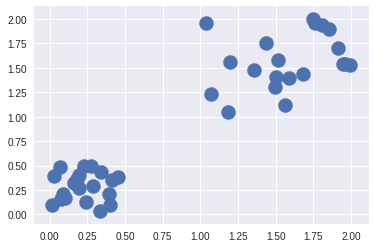

In [10]:
plt.scatter(dataset[:,0], dataset[:,1], s= 200)
plt.show()

In [0]:
from tensorflow.contrib.factorization import KMeans
from tensorflow.contrib.factorization.python.ops import clustering_ops

In [12]:
#k_means_estimator = kmeans.KMeansClustering(num_clusters=3)
#k_means_estimator = kmeans.KMeansClustering(num_clusters=3, use_mini_batch=False,relative_tolerance=1)

num_clusters = 5
kmeans = tf.contrib.factorization.KMeansClustering(
    num_clusters=num_clusters, use_mini_batch=False)



INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8g6kj0cd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f11d8496860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
# train
num_iterations = 10
previous_centers = None
#for _ in range(num_iterations):
kmeans.train(input_fn=lambda: input_fn(dataset), steps =1000)
cluster_centers = kmeans.cluster_centers()
if previous_centers is not None:
  print ('delta:', cluster_centers - previous_centers)
previous_centers = cluster_centers
print ('score:', kmeans.score(lambda : input_fn(dataset)))
print('cluster centers:', cluster_centers) 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp8g6kj0cd/model.ckpt.
INFO:tensorflow:loss = 7.2130837, step = 1
INFO:tensorflow:global_step/sec: 1236.61
INFO:tensorflow:loss = 3.5184956, step = 101 (0.083 sec)
INFO:tensorflow:global_step/sec: 1298.51
INFO:tensorflow:loss = 3.5184956, step = 201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1394.05
INFO:tensorflow:loss = 3.5184956, step = 301 (0.069 sec)
INFO:tensorflow:global_step/sec: 1490.83
INFO:tensorflow:loss = 3.5184956, step = 401 (0.067 sec)
INFO:tensorflow:global_step/sec: 1415.58
INFO:tensorflow:loss = 3.5184956, step = 501 (0.071 sec)
INFO:tensorflow:global_step/sec: 1312.03
INFO:tensorflow:loss = 3.5184956, step = 601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1370.61
INFO:tensorflow:

In [18]:
clusters_2d = kmeans.cluster_centers()
clusters_2d


array([[0.184808  , 0.4071459 ],
       [1.5805825 , 1.568974  ],
       [0.06974571, 0.15478547],
       [0.36056545, 0.21551913],
       [0.        , 0.        ]], dtype=float32)

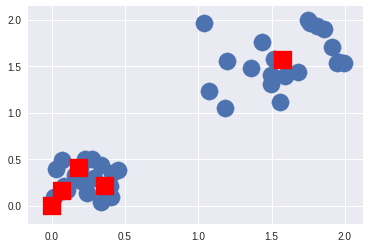

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(dataset[:,0], dataset[:,1], s=300, marker='o')
ax1.scatter(clusters_2d[:,0], clusters_2d[:,1], c='r',s=300, marker='s')

plt.show()

In [0]:
# map the input points to their clusters
cluster_indices = list(kmeans.predict_cluster_index(input_fn=lambda: input_fn(dataset)))
for i, point in enumerate(dataset):
  cluster_index = cluster_indices[i]
  center = cluster_centers[cluster_index]
  print('point:', point, 'is in cluster', cluster_index, 'centered at', center) 

In [20]:
kmeans.get_variable_names()


['clusters', 'global_step', 'initialized']

In [1]:
ex_2d_x = np.array([[0.239, 0.132]])

predict = kmeans.predict(input_fn=lambda:input_fn(ex_2d_x), yields=False)

NameError: ignored

In [26]:
print(type(predict))

<class 'generator'>


In [27]:
for x in predict:
  print(x)

Output hidden; open in https://colab.research.google.com to view.

In [0]:
predict_cluster = k_means_estimator.predict_cluster_idx(input_fn=lambda:input_fn_2d(ex_2d_x))


Instructions for updating:
Please use tf.contrib.factorization.KMeansClustering instead of tf.contrib.learn.KMeansClustering. It has a similar interface, but uses the tf.estimator.Estimator API instead of tf.contrib.learn.Estimator.


In [0]:
predict_cluster

<generator object predict_cluster_idx at 0x7f74dcc65258>